In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv('/content/Copy of Sample_DATA.csv')


In [3]:
df.head()

,Transaction_ID,Date,Time,Merchant_ID,Customer_ID,Device_ID,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,IP_Address,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
0,T00022452,20/04/23,4:50:22 AM,f65a902b-2396-40cc-9593-97e103f1bc15,89aaeceb-21f5-46c8-9de3-89dde6a10a75,c1e0deb4-7c97-4178-a838-38f4a2f0b57c,Refund,SamplePay,Durgapur,Chhattisgarh,140.213.7.48,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1
1,T00032233,08/08/23,8:09:21 AM,d4a5efcb-4eb6-4d3a-8132-07bb3e6e13a4,8a8962f9-e84a-4573-ab0b-187311978a21,62e14f64-b0ba-4284-889a-51ac05baf33e,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,184.108.177.45,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1
2,T00037364,25/06/23,7:49:01 AM,759ad138-9473-4729-8699-3d72c7ffb983,c3f53ce6-e305-4460-a71d-93bde26043ab,4281c542-ac77-4269-b4bb-1de93ac12677,Bank Transfer,Other,New Delhi,Himachal Pradesh,16.106.248.163,Failed,Android,2,Utilities,Online,44.19,22,106.69,1
3,T00015924,28/01/24,5:44:12 AM,d8f561e4-bded-4ef0-bcd8-5494b2e31a94,9f0c5613-7d4c-4454-bee1-c47fbba406a1,058b6488-2469-42f2-bc7f-707921d35cad,Subscription,UPI Pay,Bharatpur,Chhattisgarh,65.245.160.212,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1
4,T00021805,21/06/23,9:40:59 AM,26fdd7a1-8537-4dfe-bcf7-f5a127b36682,bf9aa6d5-7d3d-43f9-8631-31336720a383,068ff12c-127a-4cfb-9899-ddde37060b28,Investment,Dummy Bank,Sagar,Mizoram,33.172.152.38,Completed,MacOS,1,Other,Online,12.38,25,374.89,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                647 non-null    object 
 1   Date                          647 non-null    object 
 2   Time                          647 non-null    object 
 3   Merchant_ID                   647 non-null    object 
 4   Customer_ID                   647 non-null    object 
 5   Device_ID                     647 non-null    object 
 6   Transaction_Type              647 non-null    object 
 7   Payment_Gateway               647 non-null    object 
 8   Transaction_City              647 non-null    object 
 9   Transaction_State             647 non-null    object 
 10  IP_Address                    647 non-null    object 
 11  Transaction_Status            647 non-null    object 
 12  Device_OS                     647 non-null    object 
 13  Trans

In [5]:
df.describe()

,Transaction_Frequency,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
count,647.000000,647.000000,647.000000,647.000000,647.000000
mean,3.564142,5.014668,15.717156,128.839753,0.239567
std,6.454543,56.375914,8.218122,364.995747,0.427150
min,0.000000,-99.470000,1.000000,0.120000,0.000000
25%,1.000000,-42.355000,8.500000,17.155000,0.000000
50%,2.000000,8.380000,16.000000,35.000000,0.000000
75%,3.000000,52.290000,23.000000,74.770000,0.000000
max,50.000000,99.450000,29.000000,4883.620000,1.000000


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isnull().sum()

,0
Transaction_ID,0
Date,0
Time,0
Merchant_ID,0
Customer_ID,0
Device_ID,0
Transaction_Type,0
Payment_Gateway,0
Transaction_City,0
Transaction_State,0


In [8]:
df.shape

(647, 20)

In [9]:
df.nunique()

,0
Transaction_ID,647
Date,302
Time,641
Merchant_ID,647
Customer_ID,647
Device_ID,647
Transaction_Type,7
Payment_Gateway,9
Transaction_City,281
Transaction_State,28


Drop the unique values

In [10]:
df.columns

Index(['Transaction_ID', 'Date', 'Time', 'Merchant_ID', 'Customer_ID',
       'Device_ID', 'Transaction_Type', 'Payment_Gateway', 'Transaction_City',
       'Transaction_State', 'IP_Address', 'Transaction_Status', 'Device_OS',
       'Transaction_Frequency', 'Merchant_Category', 'Transaction_Channel',
       'Transaction_Amount_Deviation', 'Days_Since_Last_Transaction', 'amount',
       'fraud'],
      dtype='object')

In [11]:
df.drop(['Transaction_ID','Merchant_ID', 'Customer_ID', 'Device_ID', 'IP_Address'], axis=1, inplace=True)

In [12]:
df.head()

,Date,Time,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
0,20/04/23,4:50:22 AM,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1
1,08/08/23,8:09:21 AM,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1
2,25/06/23,7:49:01 AM,Bank Transfer,Other,New Delhi,Himachal Pradesh,Failed,Android,2,Utilities,Online,44.19,22,106.69,1
3,28/01/24,5:44:12 AM,Subscription,UPI Pay,Bharatpur,Chhattisgarh,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1
4,21/06/23,9:40:59 AM,Investment,Dummy Bank,Sagar,Mizoram,Completed,MacOS,1,Other,Online,12.38,25,374.89,1


In [13]:
df.Date

,Date
0,20/04/23
1,08/08/23
2,25/06/23
3,28/01/24
4,21/06/23
...,...
642,24/07/23
643,05/07/23
644,16/04/23
645,28/10/23


In [14]:
df[['Date','amount']]

,Date,amount
0,20/04/23,396.62
1,08/08/23,121.94
2,25/06/23,106.69
3,28/01/24,3611.11
4,21/06/23,374.89
...,...,...
642,24/07/23,28.27
643,05/07/23,26.26
644,16/04/23,6.02
645,28/10/23,17.12


In [15]:
import datetime as dt

In [16]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')


In [17]:
df['Year'] = df['Date'].dt.year


In [18]:
df['Month'] = df['Date'].dt.month


In [19]:
df.head()

,Date,Time,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year,Month
0,2023-04-20,4:50:22 AM,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1,2023,4
1,2023-08-08,8:09:21 AM,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1,2023,8
2,2023-06-25,7:49:01 AM,Bank Transfer,Other,New Delhi,Himachal Pradesh,Failed,Android,2,Utilities,Online,44.19,22,106.69,1,2023,6
3,2024-01-28,5:44:12 AM,Subscription,UPI Pay,Bharatpur,Chhattisgarh,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1,2024,1
4,2023-06-21,9:40:59 AM,Investment,Dummy Bank,Sagar,Mizoram,Completed,MacOS,1,Other,Online,12.38,25,374.89,1,2023,6


In [20]:
df['Month'].sort_values(ascending=True).unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [21]:
months = {1: 'Jan', 2: 'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

In [22]:
  df['Month'] = df['Month'].map(months)

In [23]:
df.head()

,Date,Time,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year,Month
0,2023-04-20,4:50:22 AM,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1,2023,Apr
1,2023-08-08,8:09:21 AM,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1,2023,Aug
2,2023-06-25,7:49:01 AM,Bank Transfer,Other,New Delhi,Himachal Pradesh,Failed,Android,2,Utilities,Online,44.19,22,106.69,1,2023,Jun
3,2024-01-28,5:44:12 AM,Subscription,UPI Pay,Bharatpur,Chhattisgarh,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1,2024,Jan
4,2023-06-21,9:40:59 AM,Investment,Dummy Bank,Sagar,Mizoram,Completed,MacOS,1,Other,Online,12.38,25,374.89,1,2023,Jun


In [24]:
df.drop(['Time'], axis=1, inplace=True)

In [25]:
df['fraud'].value_counts(normalize=True)*100

,proportion
fraud,
0,76.043277
1,23.956723


<Axes: xlabel='fraud', ylabel='count'>

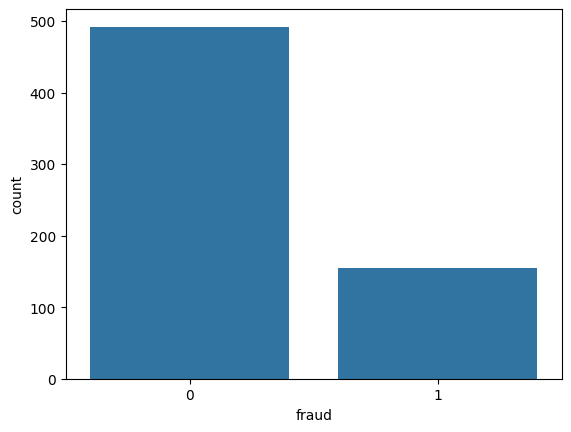

In [26]:
sns.countplot(data = df, x='fraud')

In [27]:
fraud = df[df['fraud'] == 1]

In [28]:
fraud.shape

(155, 16)

In [29]:
fraud.head()

,Date,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year,Month
0,2023-04-20,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1,2023,Apr
1,2023-08-08,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1,2023,Aug
2,2023-06-25,Bank Transfer,Other,New Delhi,Himachal Pradesh,Failed,Android,2,Utilities,Online,44.19,22,106.69,1,2023,Jun
3,2024-01-28,Subscription,UPI Pay,Bharatpur,Chhattisgarh,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1,2024,Jan
4,2023-06-21,Investment,Dummy Bank,Sagar,Mizoram,Completed,MacOS,1,Other,Online,12.38,25,374.89,1,2023,Jun


In [30]:
normal = df[df['fraud']==0]

In [31]:
normal.head()

,Date,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year,Month
155,2023-05-16,Bill Payment,Dummy Bank,Tinsukia,Assam,Completed,MacOS,2,Purchases,Mobile,36.06,26,32.21,0,2023,May
156,2023-04-21,Bank Transfer,Sigma Bank,Anand,Jharkhand,Pending,Windows,6,Brand Vouchers and OTT,Online,-58.43,19,18.45,0,2023,Apr
157,2023-07-31,Bank Transfer,CReditPAY,Bhatpara,Goa,Completed,Windows,1,Travel bookings,Mobile,17.80,12,6.06,0,2023,Jul
158,2023-07-23,Bank Transfer,Gamma Bank,South Dumdum,Tripura,Pending,Android,5,Utilities,Online,-24.80,4,64.88,0,2023,Jul
159,2023-08-27,Bank Transfer,Alpha Bank,Tumkur,Haryana,Completed,MacOS,2,Financial services and Taxes,In-store,0.49,18,52.33,0,2023,Aug


In [32]:
normal.value_counts()

Date        Transaction_Type  Payment_Gateway  Transaction_City  Transaction_State  Transaction_Status  Device_OS  Transaction_Frequency  Merchant_Category       Transaction_Channel  Transaction_Amount_Deviation  Days_Since_Last_Transaction  amount  fraud  Year  Month
2024-04-11  Subscription      Bank of Data     Chandigarh        Assam              Completed           MacOS      2                      Brand Vouchers and OTT  Online                18.65                        25                           18.83   0      2024  Apr      1
2023-04-14  Investment        Gamma Bank       Jammu             Andhra Pradesh     Completed           Android    5                      Investment              Online                37.53                        15                           46.67   0      2023  Apr      1
2023-04-15  Investment        Gamma Bank       Ichalkaranji      Maharashtra        Pending             Android    1                      Utilities               In-store             -25.08                        18                           0.12    0      2023  Apr      1
            Subscription      Alpha Bank       Erode             Mizoram            Failed              Android    2                      Utilities               In-store              11.32                        4                            10.23   0      2023  Apr      1
                              SamplePay        Bhatpara          Himachal Pradesh   Pending             Windows    0                      Brand Vouchers and OTT  Mobile                2.44                         11                           11.81   0      2023  Apr      1
                                                                                                                                                                                                                                                                               ..
2023-04-27  Refund            UPI Pay          Kollam            Assam              Pending             Android    5                      Investment              In-store              92.10                        29                           0.47    0      2023  Apr      1
            Bank Transfer     CReditPAY        Nagpur            Mizoram            Pending             MacOS      2                      Utilities               Online                69.86                        26                           6.79    0      2023  Apr      1
2023-04-24  Subscription      Sigma Bank       Berhampore        Gujarat            Completed           Windows    4                      Purchases               Online                22.34                        22                           3.95    0      2023  Apr      1
            Investment        Dummy Bank       Karimnagar        Kerala             Failed              MacOS      7                      Investment              Mobile               -71.15                        7                            58.66   0      2023  Apr      1
2023-04-22  Subscription      Dummy Bank       Hospet            Gujarat            Pending             iOS        1                      Investment              In-store             -18.91                        27                           69.95   0      2023  Apr      1
Name: count, Length: 492, dtype: int64

In [33]:
normal.shape

(492, 16)

In [34]:
fraud.head()

,Date,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year,Month
0,2023-04-20,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1,2023,Apr
1,2023-08-08,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1,2023,Aug
2,2023-06-25,Bank Transfer,Other,New Delhi,Himachal Pradesh,Failed,Android,2,Utilities,Online,44.19,22,106.69,1,2023,Jun
3,2024-01-28,Subscription,UPI Pay,Bharatpur,Chhattisgarh,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1,2024,Jan
4,2023-06-21,Investment,Dummy Bank,Sagar,Mizoram,Completed,MacOS,1,Other,Online,12.38,25,374.89,1,2023,Jun


In [35]:
fraud.dtypes

,0
Date,datetime64[ns]
Transaction_Type,object
Payment_Gateway,object
Transaction_City,object
Transaction_State,object
Transaction_Status,object
Device_OS,object
Transaction_Frequency,int64
Merchant_Category,object
Transaction_Channel,object


In [36]:
fraud.describe()

,Date,Transaction_Frequency,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year
count,155,155.000000,155.000000,155.000000,155.000000,155.0,155.000000
mean,2023-10-23 00:46:27.096774144,4.116129,1.662581,16.045161,422.772710,1.0,2023.296774
min,2023-04-14 00:00:00,0.000000,-97.770000,1.000000,3.770000,1.0,2023.000000
25%,2023-08-06 12:00:00,1.000000,-45.240000,9.000000,138.775000,1.0,2023.000000
50%,2023-10-22 00:00:00,2.000000,3.580000,17.000000,272.160000,1.0,2023.000000
75%,2024-01-10 12:00:00,3.000000,48.580000,22.500000,469.320000,1.0,2024.000000
max,2024-04-08 00:00:00,50.000000,99.280000,29.000000,4883.620000,1.0,2024.000000
std,NaN,8.139973,57.663342,7.997030,642.515123,0.0,0.458317


In [37]:
numeric_columns =  df.select_dtypes(include=['int64','float64'])

In [38]:
corr= numeric_columns.corr()
corr

,Transaction_Frequency,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
Transaction_Frequency,1.000000,0.045265,0.027643,-0.009595,0.048038
Transaction_Amount_Deviation,0.045265,1.000000,0.004454,-0.023976,-0.033400
Days_Since_Last_Transaction,0.027643,0.004454,1.000000,0.034215,0.022420
amount,-0.009595,-0.023976,0.034215,1.000000,0.452355
fraud,0.048038,-0.033400,0.022420,0.452355,1.000000


In [39]:
numeric_columns_df = fraud.select_dtypes(include=['int64','float64'])

In [40]:
corr = numeric_columns_df.corr()
corr

,Transaction_Frequency,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
Transaction_Frequency,1.000000,0.112079,0.048399,-0.047628,NaN
Transaction_Amount_Deviation,0.112079,1.000000,-0.057579,-0.034097,NaN
Days_Since_Last_Transaction,0.048399,-0.057579,1.000000,0.078918,NaN
amount,-0.047628,-0.034097,0.078918,1.000000,NaN
fraud,NaN,NaN,NaN,NaN,NaN


<ipython-input-41-1392242323>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraud, x='Transaction_Type', palette='pastel', order=fraud['Transaction_Type'].value_counts().index)


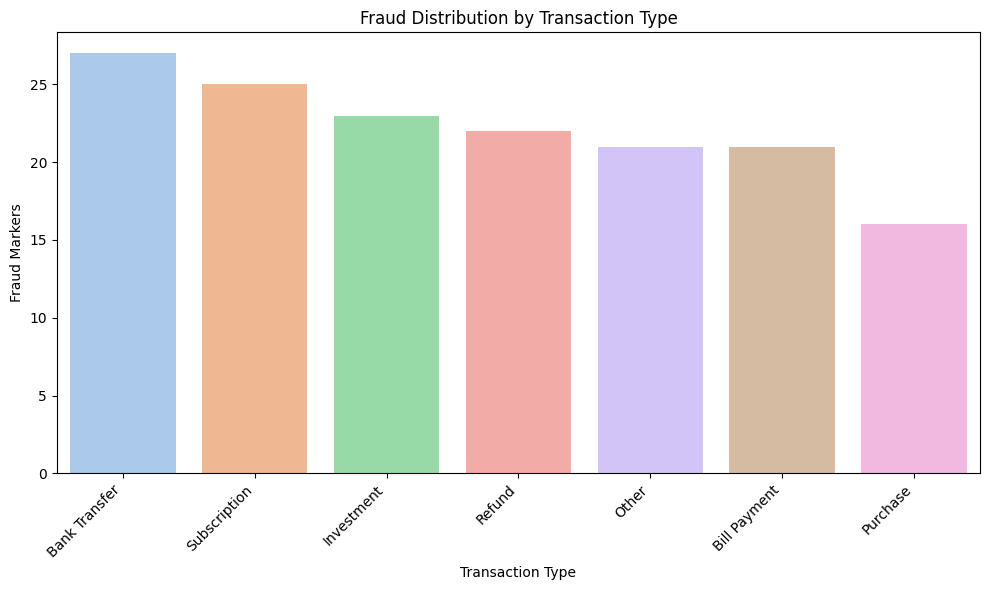

In [41]:
# Plot 1: Fraud distribution by Transaction Type
plt.figure(figsize=(10, 6))
sns.countplot(data=fraud, x='Transaction_Type', palette='pastel', order=fraud['Transaction_Type'].value_counts().index)
plt.title('Fraud Distribution by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Fraud Markers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

<ipython-input-42-1857316173>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraud, x='Merchant_Category', palette='pastel', order=fraud['Merchant_Category'].value_counts().index)


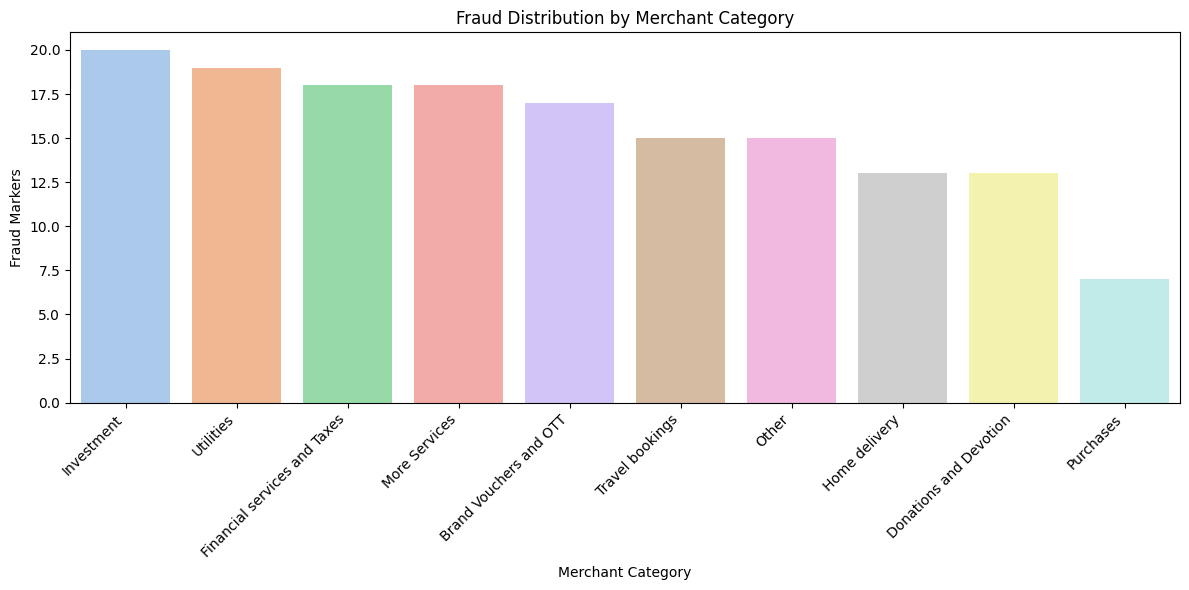

In [42]:
# Plot 3: Fraud distribution by Merchant Category
plt.figure(figsize=(12, 6))
sns.countplot(data=fraud, x='Merchant_Category', palette='pastel', order=fraud['Merchant_Category'].value_counts().index)
plt.title('Fraud Distribution by Merchant Category')
plt.xlabel('Merchant Category')
plt.ylabel('Fraud Markers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

<ipython-input-43-3997409604>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraud, x='Transaction_State', palette='pastel', order=fraud['Transaction_State'].value_counts().index)


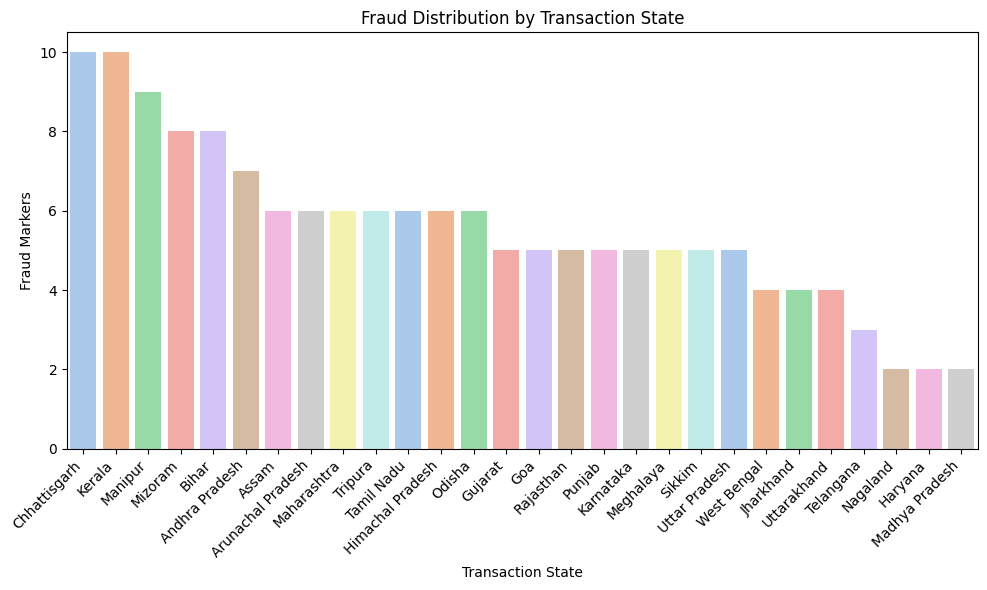

In [43]:
# Plot 7: Relationship between Transaction_State and Fraud using bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=fraud, x='Transaction_State', palette='pastel', order=fraud['Transaction_State'].value_counts().index)
plt.title('Fraud Distribution by Transaction State')
plt.xlabel('Transaction State')
plt.ylabel('Fraud Markers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


<ipython-input-44-1268874564>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraud, x='Device_OS', palette='pastel', order=fraud['Device_OS'].value_counts().index)


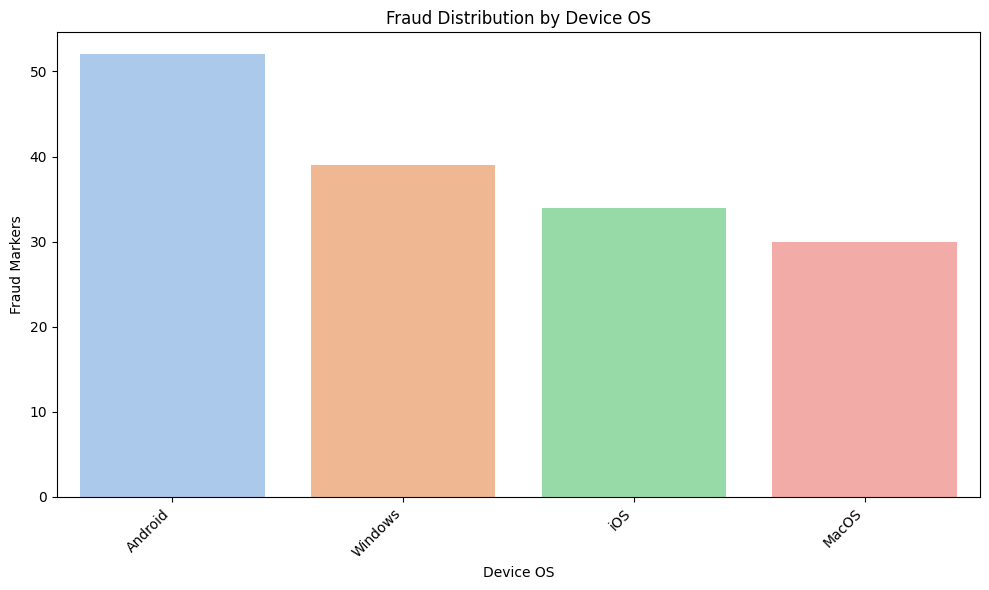

In [44]:
# Plot 8: Relationship between Device_OS and Fraud using bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=fraud, x='Device_OS', palette='pastel', order=fraud['Device_OS'].value_counts().index)
plt.title('Fraud Distribution by Device OS')
plt.xlabel('Device OS')
plt.ylabel('Fraud Markers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [45]:
from scipy.stats import chi2_contingency

In [46]:
def chi_square_analysis(df, target_variable, alpha=0.05):
    categorical_vars = df.select_dtypes(include=['object'])
    results = []

    for cat_var in categorical_vars:
        contingency_table = pd.crosstab(df[cat_var], df[target_variable])
        chi2, p, _, _ = chi2_contingency(contingency_table)

        if p >= alpha:
            comment = "No significant association with " + target_variable
            recommendation = "Can be removed"
        else:
            comment = "Significant association with " + target_variable
            recommendation = ""

        results.append([cat_var, chi2, p, comment, recommendation])

    results_df = pd.DataFrame(results, columns=['Column', 'Chi-square statistic', 'p-value', 'Comment', 'Recommendation'])
    return results_df

In [47]:
result = chi_square_analysis(df, 'fraud')
result

,Column,Chi-square statistic,p-value,Comment,Recommendation
0,Transaction_Type,2.216333,0.898766,No significant association with fraud,Can be removed
1,Payment_Gateway,1.129164,0.997293,No significant association with fraud,Can be removed
2,Transaction_City,272.281348,0.618284,No significant association with fraud,Can be removed
3,Transaction_State,14.979792,0.969714,No significant association with fraud,Can be removed
4,Transaction_Status,1.426220,0.490118,No significant association with fraud,Can be removed
5,Device_OS,3.914591,0.270836,No significant association with fraud,Can be removed
6,Merchant_Category,3.867471,0.919917,No significant association with fraud,Can be removed
7,Transaction_Channel,4.464418,0.107291,No significant association with fraud,Can be removed
8,Month,13.547624,0.259043,No significant association with fraud,Can be removed


In [48]:
columns_to_drop = ['Days_Since_Last_Transaction', 'Transaction_Frequency', 'Transaction_Amount_Deviation',
                   'Transaction_Status', 'Date', 'Device_OS', 'Transaction_Channel']

df.drop(columns=columns_to_drop, inplace=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_Type   647 non-null    object 
 1   Payment_Gateway    647 non-null    object 
 2   Transaction_City   647 non-null    object 
 3   Transaction_State  647 non-null    object 
 4   Merchant_Category  647 non-null    object 
 5   amount             647 non-null    float64
 6   fraud              647 non-null    int64  
 7   Year               647 non-null    int32  
 8   Month              647 non-null    object 
dtypes: float64(1), int32(1), int64(1), object(6)
memory usage: 43.1+ KB


In [50]:
data = df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_Type   647 non-null    object 
 1   Payment_Gateway    647 non-null    object 
 2   Transaction_City   647 non-null    object 
 3   Transaction_State  647 non-null    object 
 4   Merchant_Category  647 non-null    object 
 5   amount             647 non-null    float64
 6   fraud              647 non-null    int64  
 7   Year               647 non-null    int32  
 8   Month              647 non-null    object 
dtypes: float64(1), int32(1), int64(1), object(6)
memory usage: 43.1+ KB


In [51]:
data['Year'] = data['Year'].astype('object')

In [52]:
categorical_cols = data.select_dtypes(include=['object']).columns
categorical_cols

Index(['Transaction_Type', 'Payment_Gateway', 'Transaction_City',
       'Transaction_State', 'Merchant_Category', 'Year', 'Month'],
      dtype='object')

In [53]:
from sklearn.preprocessing import LabelEncoder
cols = ['Year', 'Month']
label_encoder = LabelEncoder()
for col in cols:
    data[col] = label_encoder.fit_transform(data[col])


In [54]:
# Numerical columns
non_ordinal = ['Transaction_Type', 'Payment_Gateway', 'Transaction_City','Transaction_State','Merchant_Category']

# performing one hot encoding for non_ordinal variables
data = pd.get_dummies(data, columns=non_ordinal, drop_first=True)

# Convert boolean columns to integers
data = data.astype(int)

In [55]:
data.head()

,amount,fraud,Year,Month,Transaction_Type_Bill Payment,Transaction_Type_Investment,Transaction_Type_Other,Transaction_Type_Purchase,Transaction_Type_Refund,Transaction_Type_Subscription,...,Transaction_State_West Bengal,Merchant_Category_Donations and Devotion,Merchant_Category_Financial services and Taxes,Merchant_Category_Home delivery,Merchant_Category_Investment,Merchant_Category_More Services,Merchant_Category_Other,Merchant_Category_Purchases,Merchant_Category_Travel bookings,Merchant_Category_Utilities
0,396,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,121,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,106,1,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3611,1,1,4,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,374,1,0,6,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [80]:
import joblib
joblib.dump(X.columns.tolist(), 'model_features.pkl')  # Save correct column order


['model_features.pkl']

In [56]:
from sklearn.model_selection import train_test_split
fraud_data = data[data['fraud']==1]
non_fraud_data = data[data['fraud'] == 0]

In [57]:
sampled_fraud_data = fraud_data.sample(frac=0.5, random_state=42)
sampled_non_fraud_data = non_fraud_data.sample(frac=0.5, random_state=42)

In [58]:
data = pd.concat([sampled_fraud_data, sampled_non_fraud_data])

In [59]:
from sklearn.preprocessing import StandardScaler
def preprocess_data(X):
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)
  return X_scaled
X = data.drop('fraud', axis=1)
y = data['fraud']

X_scaled = preprocess_data(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [60]:
print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Test target shape:", y_test.shape)

Training features shape: (259, 333)
Test features shape: (65, 333)
Training target shape: (259,)
Test target shape: (65,)


In [61]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier  # Import XGBoost classifier


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [63]:
def evaluate_model(model, X_test, y_test):
   y_pred = model.predict(X_test)

   accuracy = accuracy_score(y_test, y_pred)
   f1 = f1_score(y_test, y_pred)
   recall = recall_score(y_test, y_pred)
   precision = precision_score(y_test, y_pred)
   roc_auc = roc_auc_score(y_test, y_pred)

   return {
        'Model': type(model).__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC Score': roc_auc
    }

In [64]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()

}

In [65]:
results = []
for model_name, model in models.items():
  model.fit(X_train, y_train)
  metrics = evaluate_model(model, X_test, y_test)  # Assuming X_test, y_test are defined
  results.append(metrics)

In [66]:
df_results = pd.DataFrame(results)

# Display the DataFrame
df_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,DecisionTreeClassifier,0.938462,0.933333,0.823529,0.875000,0.901348
1,RandomForestClassifier,0.953846,1.000000,0.823529,0.903226,0.911765
2,GradientBoostingClassifier,0.938462,0.933333,0.823529,0.875000,0.901348
3,XGBClassifier,0.953846,1.000000,0.823529,0.903226,0.911765


In [67]:
X = data.drop('fraud',axis=1)
y = data['fraud']

In [68]:
X.shape

(324, 333)

In [69]:
y.shape

(324,)

In [70]:
from imblearn.over_sampling import SMOTE

# Using SMOTE to oversample the minority class
X_res, y_res = SMOTE().fit_resample(X, y)

# Print the count of each class after oversampling
print(y_res.value_counts())


fraud
1    246
0    246
Name: count, dtype: int64


In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier  # Import XGBoost classifier

# Define a function to evaluate a model and return a dictionary of metrics
def evaluate_model(model, X_test, y_test):
    # Calculate predictions
    y_pred = model.predict(X_test)

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Return metrics as a dictionary
    return {
        'Model': type(model).__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC Score': roc_auc
    }

# Split the balanced data into training and testing sets with a test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),  # Added XGBoost to the dictionary
}

# List to store evaluation results
results = []

# Model Training and Evaluation
for model_name, model in models.items():
    print(model_name + ":")
    model.fit(X_train, y_train)  # Assuming X_train, y_train are defined
    metrics = evaluate_model(model, X_test, y_test)  # Assuming X_test, y_test are defined
    results.append(metrics)

# Create a DataFrame from the results
df_results = pd.DataFrame(results)

# Display the DataFrame
df_results

Decision Tree:
Random Forest:
Gradient Boosting:
XGBoost:


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,DecisionTreeClassifier,0.909091,0.900000,0.918367,0.909091,0.909184
1,RandomForestClassifier,0.959596,0.978723,0.938776,0.958333,0.959388
2,GradientBoostingClassifier,0.929293,0.956522,0.897959,0.926316,0.928980
3,XGBClassifier,0.959596,0.978723,0.938776,0.958333,0.959388


In [79]:
# from sklearn.model_selection import GridSearchCV

# # Define a narrower hyperparameter grid for each model
# param_grid = {
#     'Decision Tree': {'max_depth': [10, 20, 50],
#                       'min_samples_split': [2, 5, 10]},
#     'Random Forest': {'n_estimators': [50, 100, 200],
#                       'max_depth': [10, 20],
#                       'min_samples_split': [2, 5]},
#     'Gradient Boosting': {'n_estimators': [50, 100],
#                           'learning_rate': [0.05, 0.1],
#                           'max_depth': [3, 5]},
#     'XGBoost': {'n_estimators': [50, 100],
#                 'learning_rate': [0.05, 0.1],
#                 'max_depth': [3, 5]}
# }

# # Perform hyperparameter tuning for each model
# best_params = {}
# for model_name, model in models.items():
#     grid_search = GridSearchCV(estimator=model,
#                                param_grid=param_grid[model_name],
#                                scoring='f1',
#                                cv=5,
#                                verbose=2)
#     grid_search.fit(X_train, y_train)
#     best_params[model_name] = grid_search.best_params_

# # Print best hyperparameters for each model
# for model_name, params in best_params.items():
#     print(f"Best hyperparameters for {model_name}: {params}")

In [73]:
def evaluate_model(model, X_test, y_test):
    # Calculate predictions
    y_pred = model.predict(X_test)

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Return metrics as a dictionary
    return {
        'Model': type(model).__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC Score': roc_auc
    }

# Split the balanced data into training and testing sets with a test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

# Define models with best hyperparameters
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=50, min_samples_split=10),
    "Random Forest": RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=50),
    "Gradient Boosting": GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=100),
    "XGBoost": XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=100)
}

# List to store evaluation results
results = []

# Model Training and Evaluation
for model_name, model in models.items():
    print(model_name + ":")
    model.fit(X_train, y_train)  # Assuming X_train, y_train are defined
    metrics = evaluate_model(model, X_test, y_test)  # Assuming X_test, y_test are defined
    results.append(metrics)

# Create a DataFrame from the results
df_results = pd.DataFrame(results)

# Display the DataFrame
df_results

Decision Tree:
Random Forest:
Gradient Boosting:
XGBoost:


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,DecisionTreeClassifier,0.919192,0.936170,0.897959,0.916667,0.918980
1,RandomForestClassifier,0.949495,0.958333,0.938776,0.948454,0.949388
2,GradientBoostingClassifier,0.939394,0.938776,0.938776,0.938776,0.939388
3,XGBClassifier,0.969697,0.979167,0.959184,0.969072,0.969592


In [77]:
from xgboost import XGBClassifier

# Initialize and train the XGBoost classifier on the entire dataset
XGBoost_model = XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=100)
XGBoost_model.fit(X_res, y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [78]:
import pickle

# File path for saving the pickle file
pickle_file_path = "UPI Fraud Detection updated.pkl"

# Save the trained XGBoost model to a pickle file
with open(pickle_file_path, 'wb') as file:
    pickle.dump(XGBoost_model, file)

In [81]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(model, X_res, y_res, cv=5).mean())



0.9330447330447331


In [85]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['Not Fraud', 'Fraud']))



[[49  1]
 [ 2 47]]
              precision    recall  f1-score   support

   Not Fraud       0.96      0.98      0.97        50
       Fraud       0.98      0.96      0.97        49

    accuracy                           0.97        99
   macro avg       0.97      0.97      0.97        99
weighted avg       0.97      0.97      0.97        99

